## Import

In [6]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
# dataset
data = pd.read_csv('diabetes.csv').copy()

data.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Summary

In [4]:
# data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- 22 columns, 253680 rows
- all float64 datatype
- no null records

In [5]:
for col in data:
    print(f'{col}: {data[col].unique()}')

Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [5. 3. 2. 4. 1.]
MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk: [1. 0.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3

In [8]:
# diabetes change 3 groups into 2. Pre-diabetes can be grouped with diabetes.
data['Diabetes_012'] = data['Diabetes_012'].replace({2:1})
data.Diabetes_012.unique()

# rename dependent variable column to diabetes_binary

data.rename(columns = {'Diabetes_012': 'Diabetes_binary'}, inplace = True)
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


- most columns are boolean type, with values being 0 and 1
- some variables have been split into categories.
- the columns that are really numerical: 
    1. BMI
    2. MentHlth
    3. PhysHlth

In [7]:
data.shape

(253680, 22)

## Data summary

### 1. Distribution

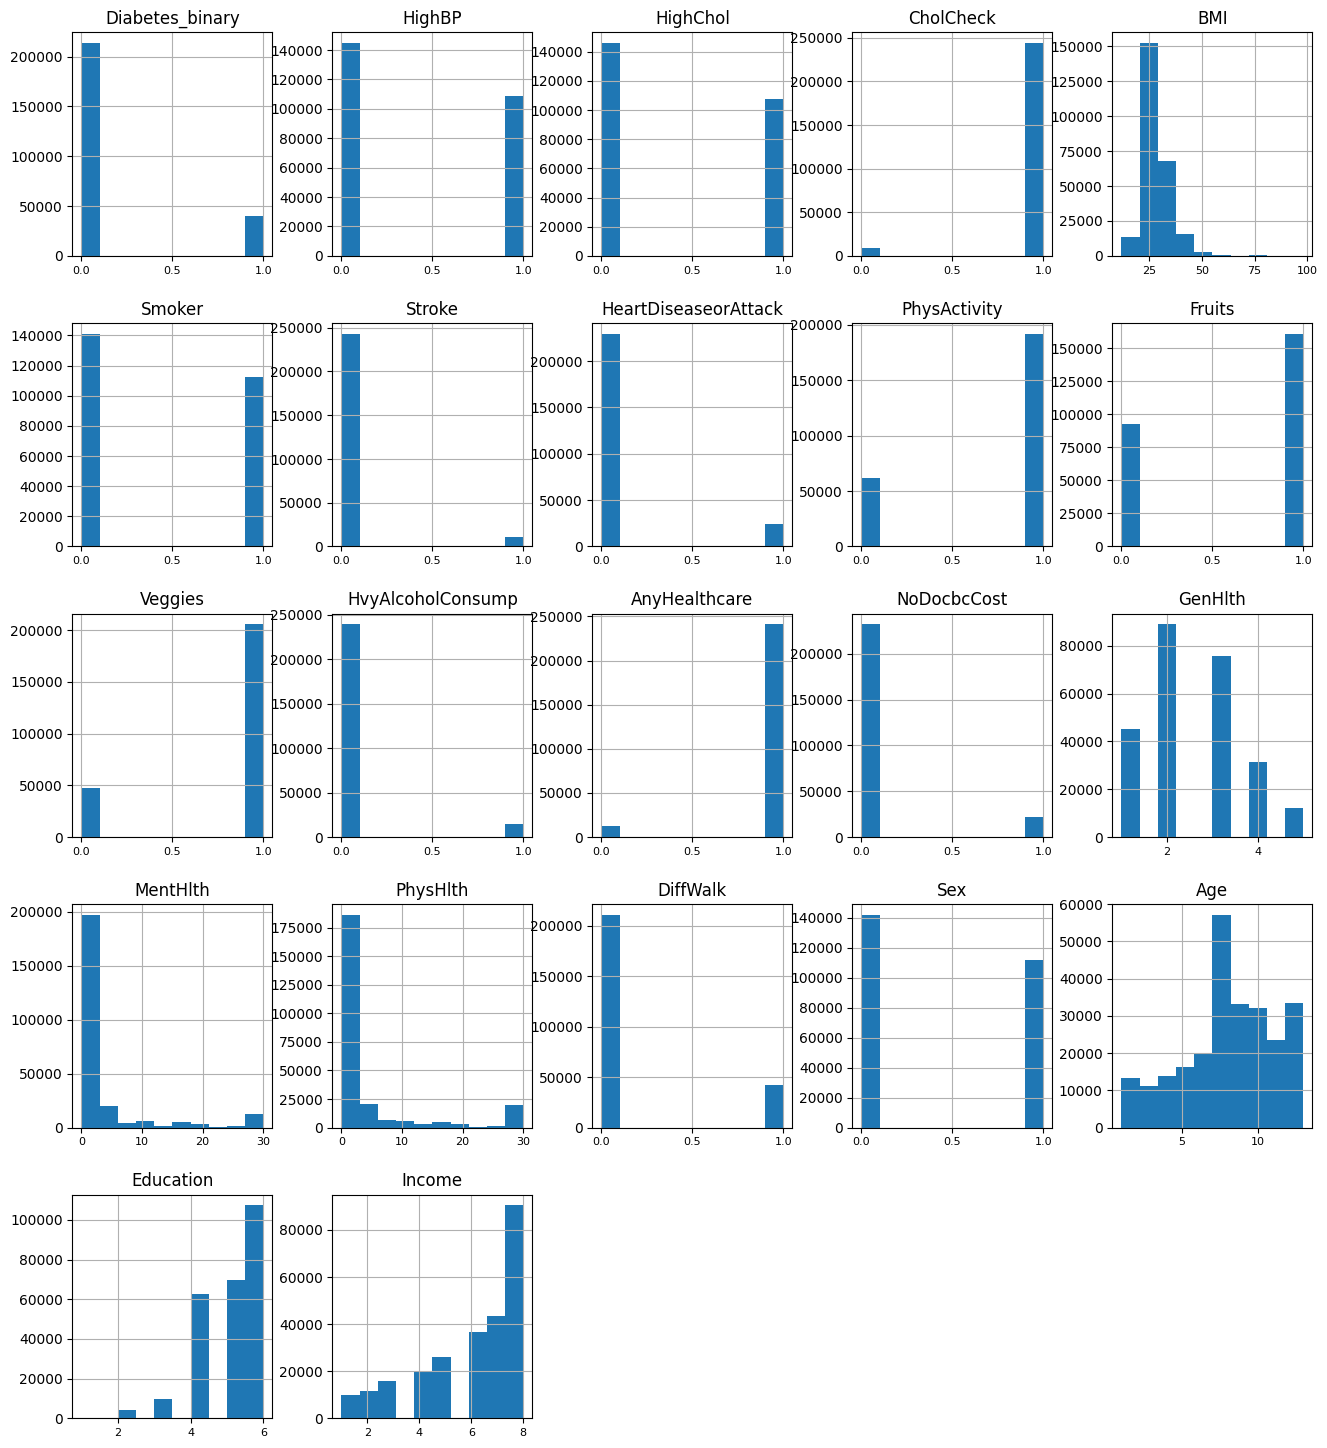

In [11]:
# distribution plot
data.hist(xlabelsize = 8, ylabelsize = 10, linewidth = 5, figsize = (16,18))
plt.show()

- noticeable difference in the following columns: 
    1. CholCheck
    2. Stroke
    3. HeartDiseaseorAttack
    4. PhysActivity
    5. Fruits
    6. Veggies
    7. DiffWalk
    8. HvyAlcolholConsump
    9. AnyHealthcare
    10. NoDocbcCost

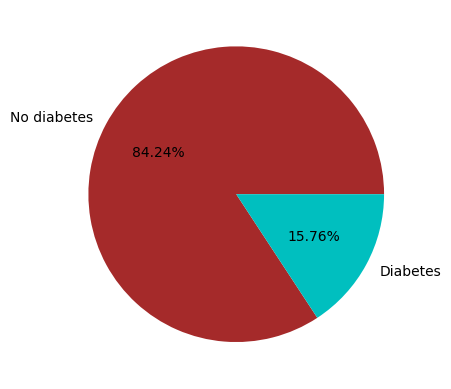

In [13]:
#plot pie chart for the DV
plt.pie(data['Diabetes_binary'].value_counts(),
         labels = ['No diabetes', 'Diabetes'],
       autopct='%1.2f%%',
       colors = ['brown', 'c'])
plt.show() 

### 2. Statistical summary for numerical columns

In [14]:
# list of numerical columns
data_num = data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']]
data_num.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


The average respondent has the following profile:
- BMI 28.38, meaning they are overweight.
- GenHlth 2.51, they consider themselves as having good health.
- MentHlth 3.18, within the last month, they only have <3 days of poor mental health.
- PhysHlth 4.24, in the last 30 days, they have had physicall illness or injuries for less than 6 days.
- Age 8.03, they are in the age range of 55 - 59 years old
- Education 5.05, they are attending university or technical school.
- Income 6.05, their income is in the range of $35,000 - $50,000

### 3. Outliers

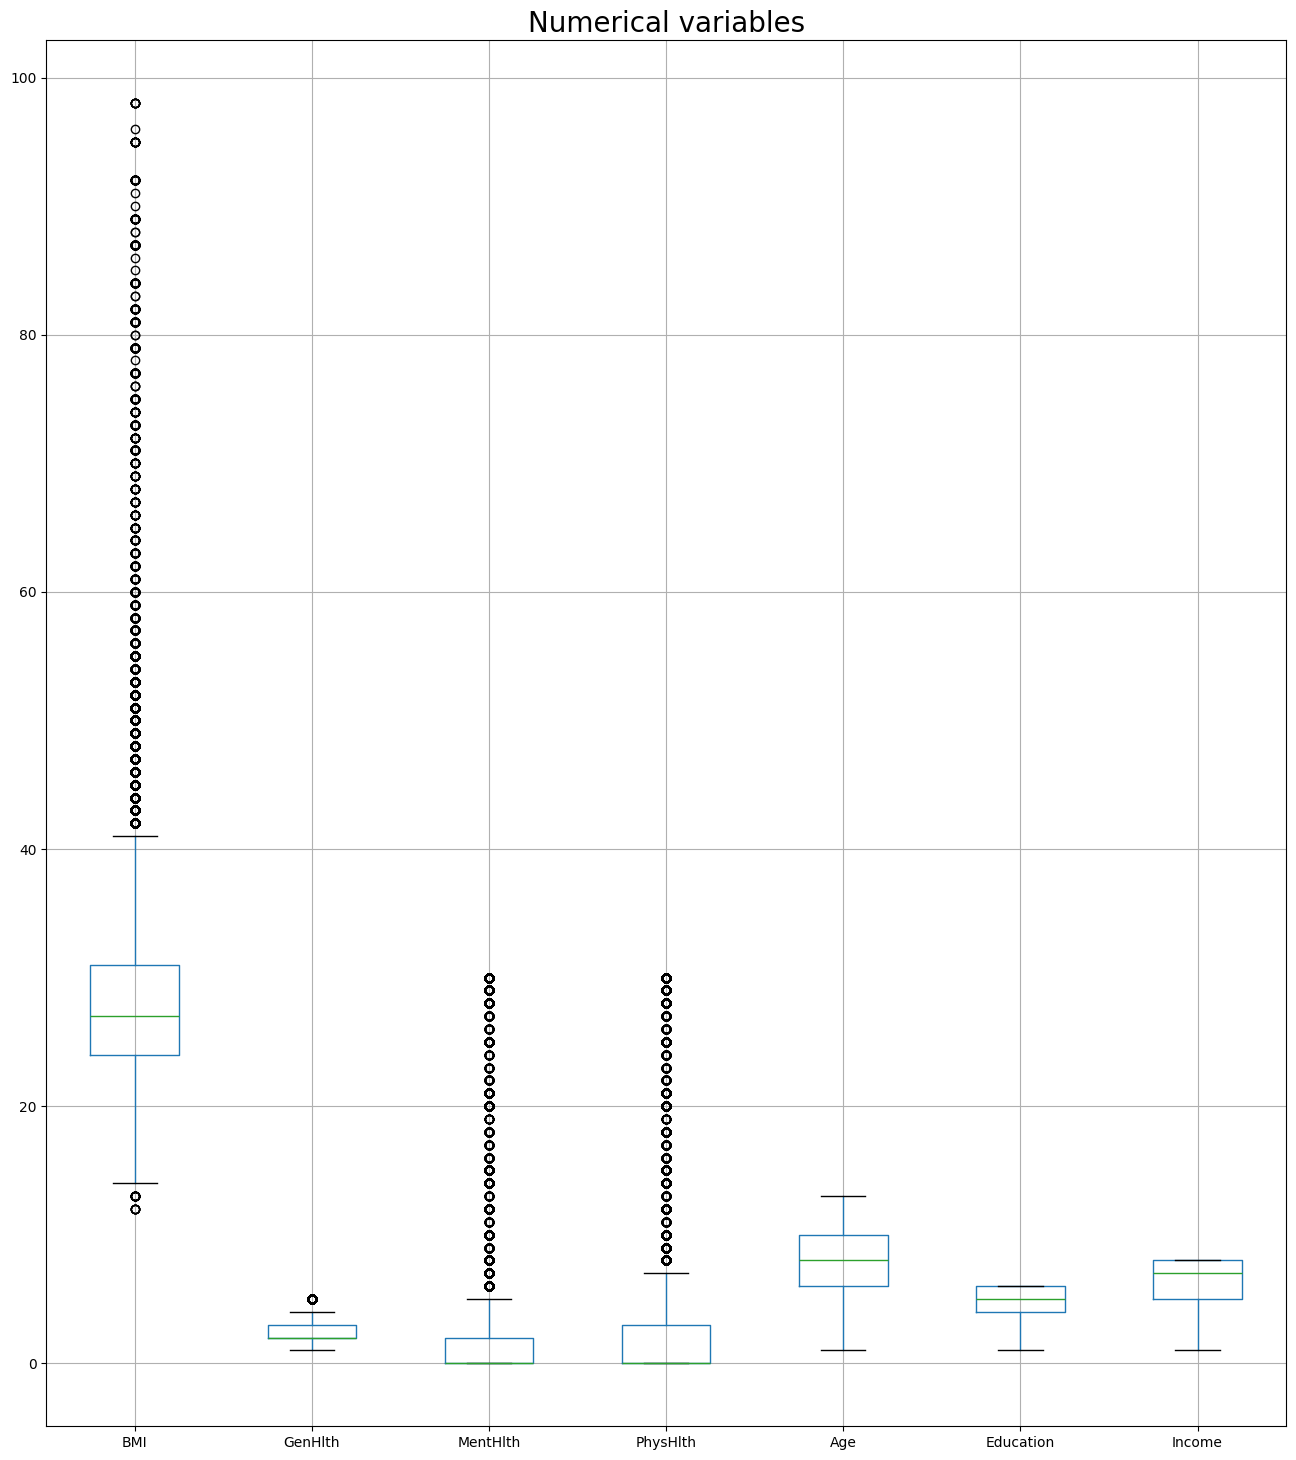

In [15]:
# boxplot of numerical columns
# list of numerical columns
df_num = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
# boxplot
plt.figure(figsize=(16, 18))
data[df_num].boxplot()
plt.title("Numerical variables", fontsize=20)
plt.show()

Lots of outliers for BMI, Mental Health, and Physical Health

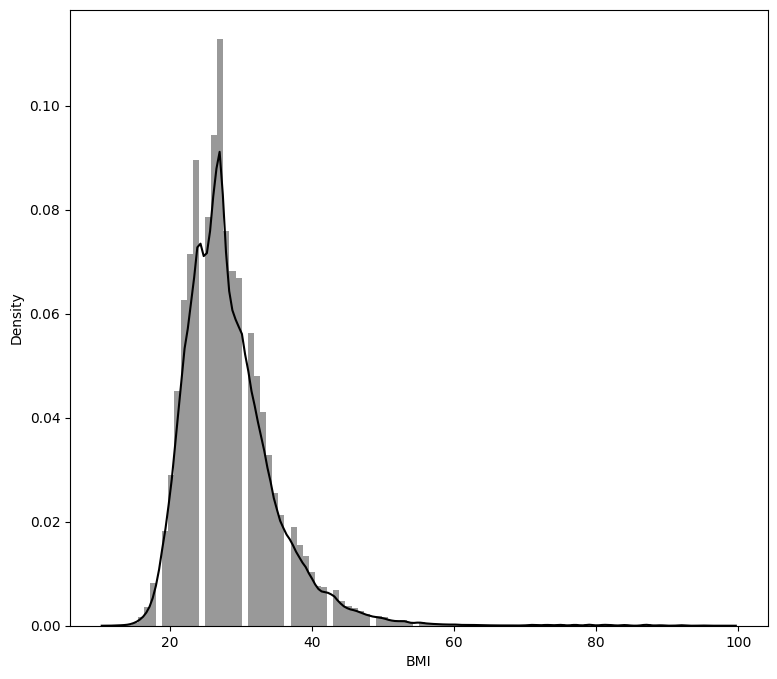

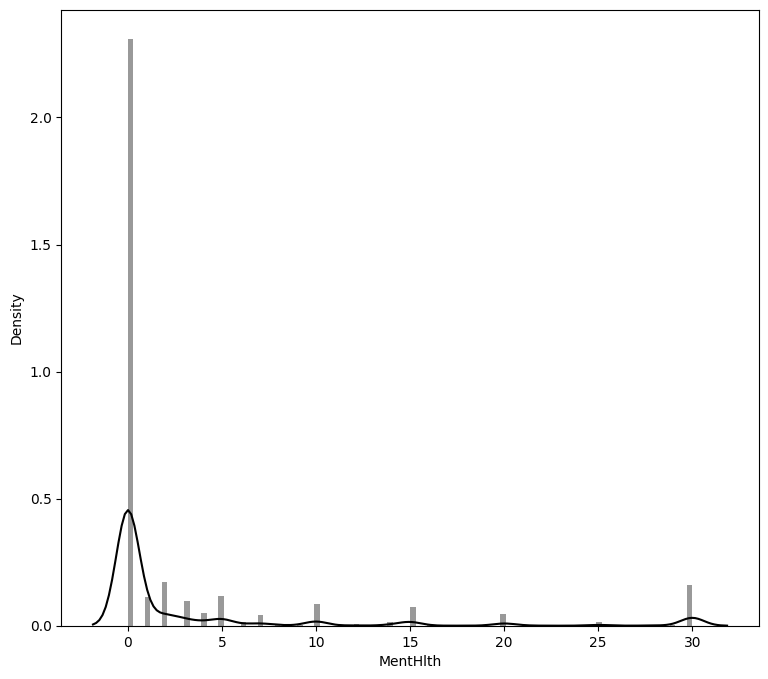

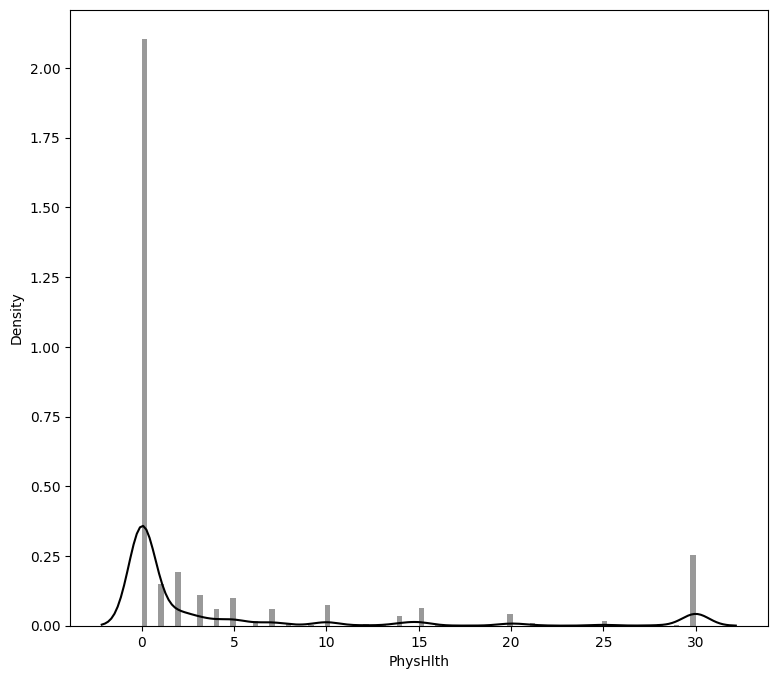

In [16]:
import warnings
warnings.filterwarnings('ignore')
# outliers distribution
# outlier columns
df_outl = ['BMI', 'MentHlth', 'PhysHlth']
# plot
for col in df_outl:
    plt.figure(figsize=(9, 8))
    sns.distplot(data[col], color = 'black', bins = 100, hist_kws = {'alpha': 0.4})

- All 3 columns are right-skewed
- BMI has outliers in the range 45 to 100.
- MentHlth and PhysHlth have outliers in the range 5 to 30.
- The effects of removing these outliers for model preformance improvements will be tested in Feature Engineering.

## Correlation

In [17]:
data_corr = data.corr()['Diabetes_binary'].sort_values(ascending=False)
data_corr

Diabetes_binary         1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Fruits                 -0.042088
HvyAlcoholConsump      -0.056682
Veggies                -0.059219
PhysActivity           -0.121392
Education              -0.131803
Income                 -0.172794
Name: Diabetes_binary, dtype: float64

<Axes: >

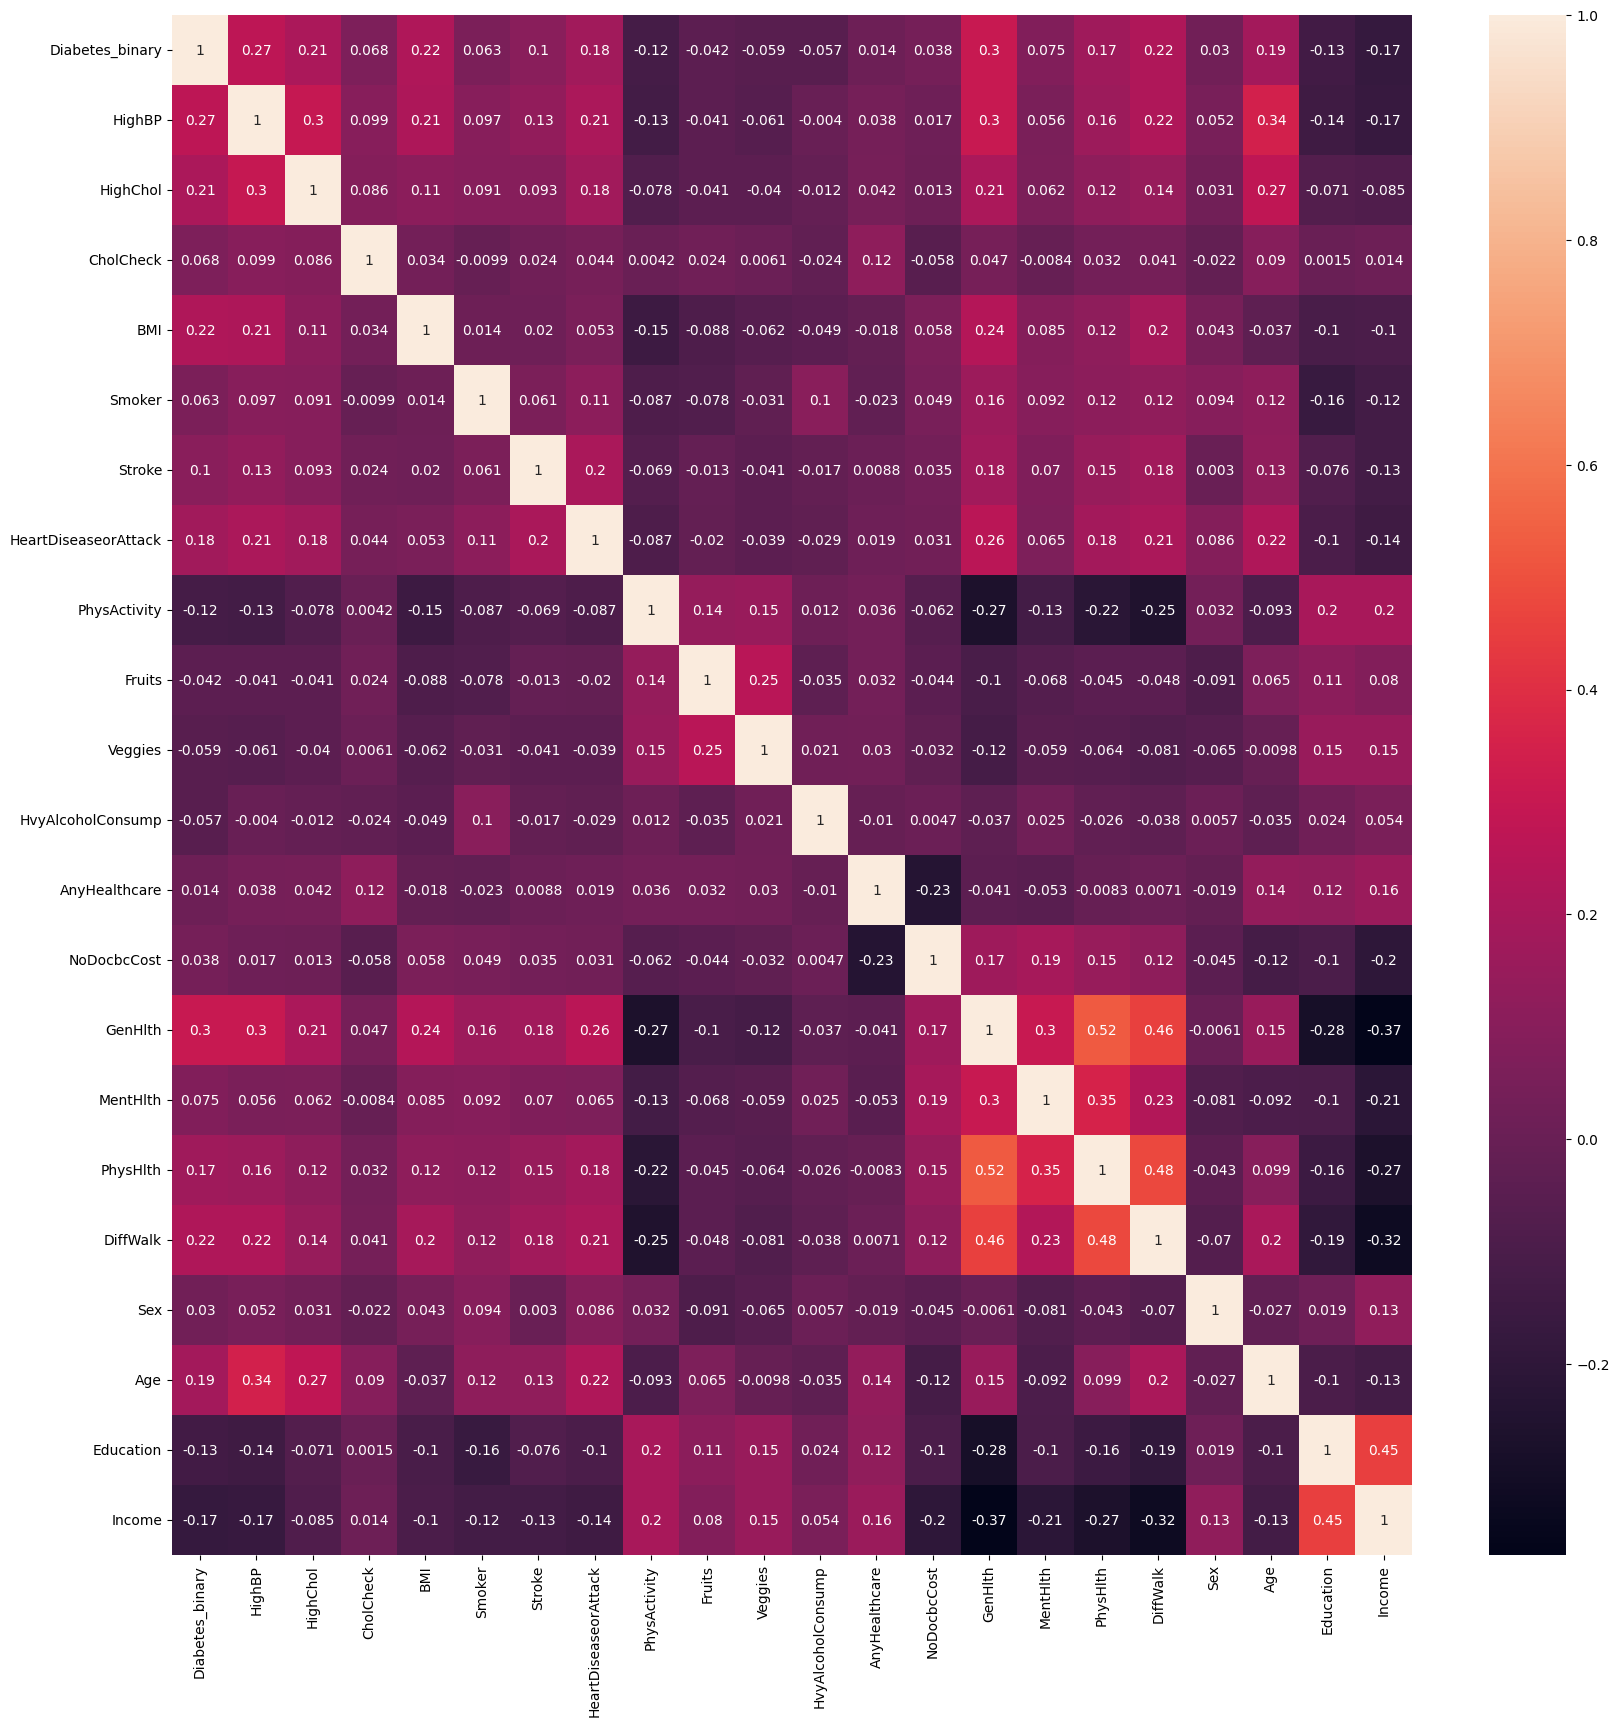

In [18]:
# correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

Correlation between variables that is > 0.4 could make it difficult to distinguish the effects of the variable to the target. Variables that have such correlation are as follows:

DiffWalk & GenHlth at 0.46,
PhysHlth & GenHlth at 0.52,
DiffWalk & PhysHlth at 0.48,
Income and Education at 0.45.

The difficulty walking variable is evaluated in categories 0 - No and 1-Yes, while GenHlth is scored from 1 to 5, with 5 being poor general health evaluation. It is expected that a person who has difficulty walking would consider their health to be poor. Additionally, the difficulty walking could indicate the lack of mobility, which is likely to result in more days per month with injuries. Therefore, the difficulty walking, general health evaluation and physical health issues are expected to be related.

Income and Education generally related, as higher education level usually yields a higher potential income due to the specialization acquired.

<Axes: >

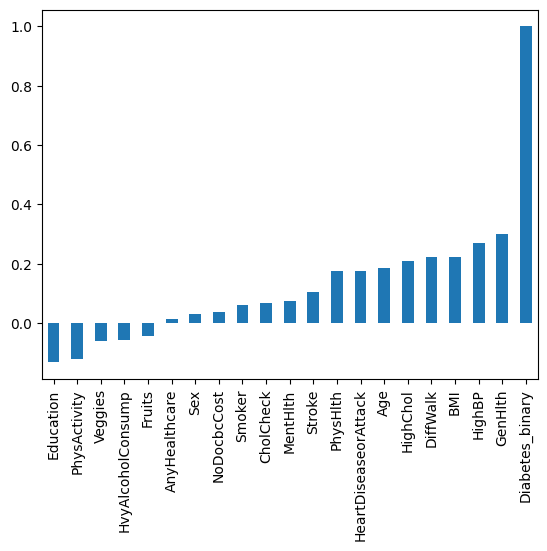

In [19]:
# correlation chart
data.corr()['Diabetes_binary'][:-1].sort_values().plot(kind='bar')

p-value

In [9]:
from scipy import stats

# Split the dataset into features (X) and the target variable (y)
X = data.drop('Diabetes_binary', axis = 1)
y = data['Diabetes_binary']

# Perform a t-test for each feature and calculate p-values
p_values = []
for feature in X.columns:
    t_stat, p_value = stats.ttest_ind(X[feature][y == 0], X[feature][y == 1])
    p_values.append(p_value)

In [10]:
# results as a dataframe
pvals = pd.DataFrame(p_values, index = X.columns)
# name the result column
pvals.columns = ['p-value']
# sort p-values, descending
pvals.sort_values(by = ['p-value'], ascending = False)

,p-value
AnyHealthcare,1.326147e-12
Sex,2.650491e-50
NoDocbcCost,8.143764e-82
Fruits,8.148747e-100
HvyAlcoholConsump,1.501684e-179
Veggies,8.078071e-196
Smoker,7.566421e-220
CholCheck,9.432119e-257
MentHlth,0.000000e+00
Education,0.000000e+00


- None of the IVs have > 0.5 correlation with the DV. However, they all have p-value < 0.05. Therefore, they cannot be ignored.
- GenHlth and HighBP have the highest correlation among the variables, 0.4 and 0.38, respectively. This falls into the range of moderate correlation.
- BMI, HighChol, Age, and DiffWalk have quite similar level of correlation.
- Some IVs have negative correlation:
    1. Fruits
    2. Veggies
    3. HvyAlcoholConsump
    4. PhysActivity
    5. Education
    6. Income 
 - Correlation between the 6 columns above and the DV are all low. Plus, columns such as HvyAlcolholConsump, Veggies, and Fruits have a significant difference in their distribution to begin with. Therefore, it would be difficult to argue, without exploring more data that the negative correlation indicates: people who eat more fruits or veggies are less likely to have diabetes. 

#### plot DV and IV with highest correlation

<Axes: xlabel='Diabetes_binary', ylabel='GenHlth'>

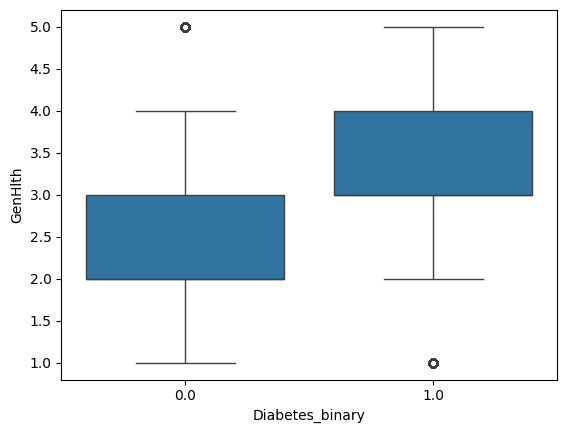

In [20]:
# GenHlth
sns.boxplot(x = 'Diabetes_binary', y = 'GenHlth', data = data)

People who rate their general health as good are less likely to have diabetes

<Axes: xlabel='Diabetes_binary', ylabel='HighBP'>

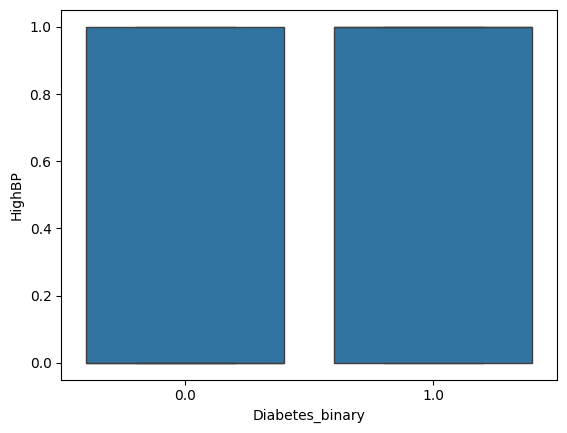

In [21]:
# HighBP
sns.boxplot(x = 'Diabetes_binary', y = 'HighBP', data = data)

High Blood Pressure does not seem to be a good indicator of diabetes.

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

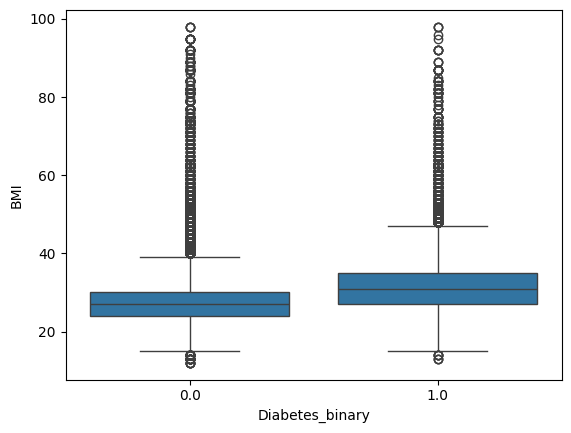

In [56]:
# BMI
sns.boxplot(x = 'Diabetes_binary', y = 'BMI', data = data)

People with lower BMI are less likely to have diabetes, however outliers make it difficult to evaluate true effects.

<Axes: xlabel='Diabetes_binary', ylabel='Age'>

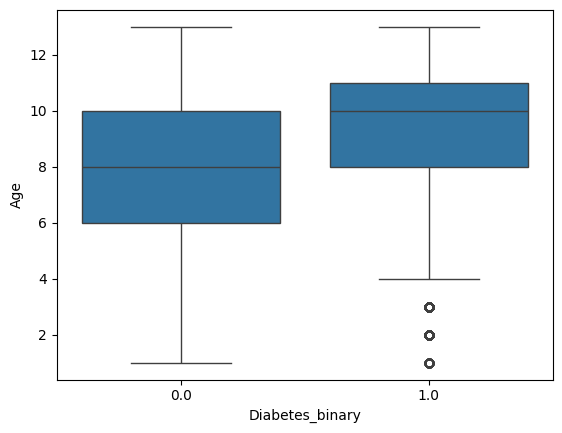

In [22]:
# Age
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)

Younger people are less likely to have diabetes.

#### plot the negative correlation

<Axes: xlabel='Diabetes_binary', ylabel='PhysActivity'>

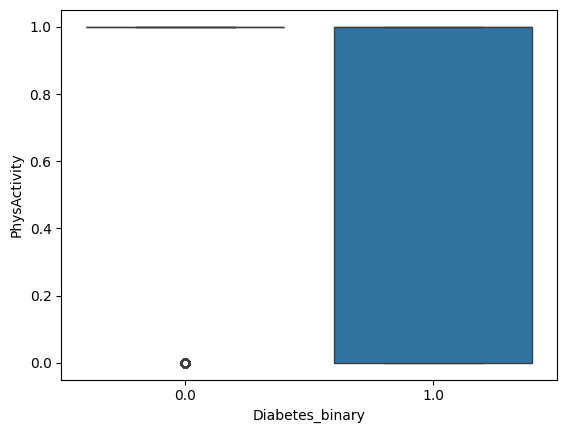

In [23]:
# PhysActivity
sns.boxplot(x = 'Diabetes_binary', y = 'PhysActivity', data = data)

People who engage in physical activity in the last 30 days (not includin jobs) are more likely to have diabetes. This might be because most of the survey participants are physically active, but activity in the 30 days don't change much, as the disease doesn't happen in such a short time.

In [24]:
data.to_csv('diabetes_clean.csv', index=False)